In [1]:
from utils.corpus import Corpus

corpus = Corpus(registry_path = 'utils/article_registry.json')

from utils.model import Model

model = Model(corpus, 90, seed=36775)
model.load_topics()

1950 - 1959: 38
1960 - 1969: 31
1970 - 1979: 53
1980 - 1989: 94
1990 - 1999: 108
2000 - 2009: 144
2010 - 2019: 341
2020 - 2029: 66


In [3]:
import pandas as pd

In [4]:
from collections import Counter

main_areas_count = Counter([topic.tags[0].capitalize() for topic in model.topics if topic.tags])

In [5]:
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

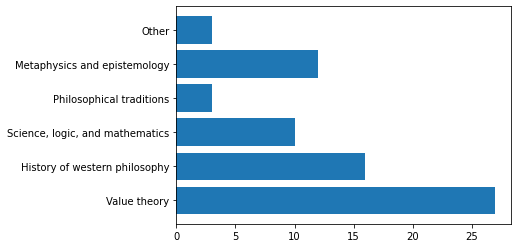

In [6]:
plt.barh(list(main_areas_count.keys()), main_areas_count.values())

In [7]:
import datetime as dt

In [13]:
data = []

for topic in model.topics:
    for doc, _ in topic.docs:
        if topic.tags:
            data.append((topic.tags[0].capitalize(), dt.datetime.strptime(doc.date, '%Y/%m/%d').year))

In [29]:
df = pd.DataFrame(data, columns = ['Main area', 'Date'])

In [20]:
df.head()

,Main area,Date
0,Value theory,2011
1,Value theory,2021
2,Value theory,2010
3,Value theory,2018
4,Value theory,2013


In [30]:
df.groupby('Main area').count()

,Date
Main area,
History of western philosophy,222
Metaphysics and epistemology,249
Other,231
Philosophical traditions,84
"Science, logic, and mathematics",160
Value theory,571


In [28]:
df

""
Main area
History of western philosophy
Metaphysics and epistemology
Other
Philosophical traditions
"Science, logic, and mathematics"
Value theory


In [15]:
import seaborn as sns

In [16]:
df.columns = ['Main area', 'Year', 'Docs']

<AxesSubplot:xlabel='Year', ylabel='Docs'>

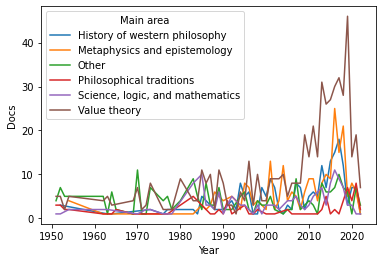

In [18]:
sns.lineplot(data = df, x = 'Year', y = 'Docs', hue = 'Main area')

## Stream graph

In [ ]:
x = np.arange(1950, 2022, 5)

y = []
for topic in topics:
    topic_array = np.zeros(len(x))
    for doc in topic.docs:
        bin = (int(doc.date[:4]) - 1950) // 5
        topic_array[bin] += 1
    y.append(topic_array)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = ax.stackplot(x, [y_ for y_ in y if np.mean(y_) > 1], baseline='sym')

Code copied from [Streamgraph with Python and Matplotlib
](https://www.python-graph-gallery.com/streamchart-basic-matplotlib)

In [ ]:
from scipy import stats

In [ ]:
def gaussian_smooth(x, y, sd):
    weights = np.array([stats.norm.pdf(x, m, sd) for m in x])
    weights = weights / weights.sum(1)
    return (weights * y).sum(1)

In [ ]:
pd.DataFrame(y).T.describe().T.sort_values('mean')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
y_smoothed = [gaussian_smooth(x, y_, 10) for y_ in y if y_.mean() > 1]
_ = ax.stackplot(x, y_smoothed, baseline="weighted_wiggle", labels=[topic.tag for topic in topics])
sns.despine(left=True)
plt.legend()